
  <h1><b>Task 2: Database Designing</b></h1>

  <p>In my second task, I focused on Database Design, implementing a normalized schema with well-defined table structures, relationships, and constraints. I incorporated primary keys, foreign keys, and optimized indexing for efficient data retrieval. Additionally, I wrote and refined SQL queries, analyzed execution plans to identify bottlenecks, and improved performance through indexing strategies. I also applied normalization and denormalization concepts, evaluating trade-offs between performance and data integrity. Furthermore, I utilized SQL profiling tools for performance monitoring, resolving issues related to locking, blocking, and slow queries.</p>


<h2>Database Design

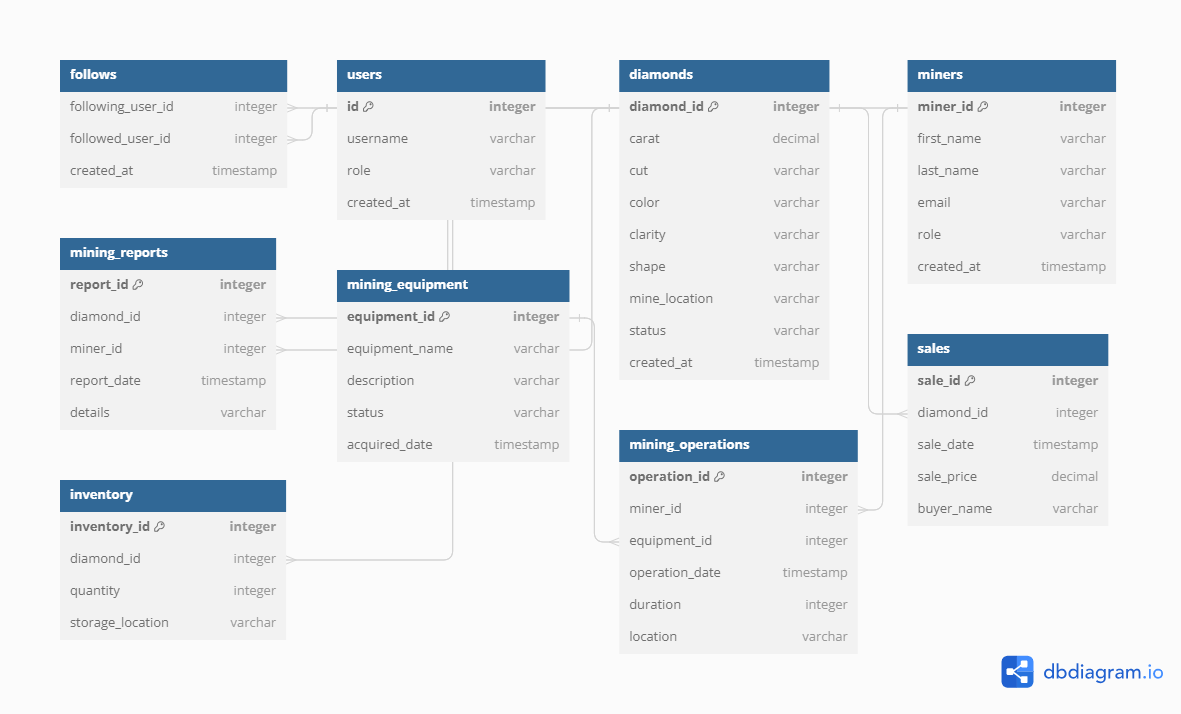


<h2> Query Optimization

In [ ]:
-- This query retrieves the total quantity of diamonds in inventory grouped by storage location

SELECT
    inventory.storage_location,
    SUM(inventory.quantity) AS total_quantity
FROM
    inventory
GROUP BY
    inventory.storage_location;

In [ ]:
-- Retrieves Mining Operations with Equipment Details

SELECT

    mining_operations.operation_id,
    mining_operations.operation_date,
    mining_operations.duration,
    mining_operations.location,
    miners.miner_id,
    miners.first_name,
    miners.last_name,
    mining_equipment.equipment_id,
    mining_equipment.equipment_name,
    mining_equipment.description,
    mining_equipment.status AS equipment_status

FROM
    mining_operations

JOIN
    miners ON mining_operations.miner_id = miners.miner_id

JOIN
    mining_equipment ON mining_operations.equipment_id = mining_equipment.equipment_id;

In [ ]:
SELECT

    diamonds.diamond_id,
    diamonds.carat,
    diamonds.cut,
    diamonds.color,
    diamonds.clarity,
    diamonds.shape,
    diamonds.mine_location,
    sales.sale_id,
    sales.sale_date,
    sales.sale_price,
    sales.buyer_name

FROM

    diamonds

LEFT JOIN

    sales ON diamonds.diamond_id = sales.diamond_id

WHERE

    diamonds.diamond_id = [specific_diamond_id];

<h2> Indexing and Tuning





In [ ]:
CREATE CLUSTERED INDEX idx_diamonds_primary ON diamonds(diamond_id);
CREATE CLUSTERED INDEX idx_miners_primary ON miners(miner_id);
CREATE CLUSTERED INDEX idx_mining_reports_primary ON mining_reports(report_id);

In [ ]:
CREATE NONCLUSTERED INDEX idx_covering_diamonds_miners_reports

ON diamonds(diamond_id, carat, cut, color, clarity, shape, mine_location, status)

INCLUDE (miner_id, first_name, last_name, email, role)

WHERE status = 'Active'; -- Filtered index if applicable

<h2>Normalization and Denormalization

<p><b>Normalization</b> is organizing data efficiently to eliminate redundancy, enhancing data integrity. For instance, breaking a table with repeated information into separate tables. <b>Denormalization</b> is re-introducing redundancy to improve performance for specific queries. This can be done by combining tables to reduce JOIN operations.


In [ ]:
-- Normalized Query

SELECT
    d.diamond_id,
    d.carat,
    d.cut,
    d.color,
    d.clarity,
    d.shape,
    d.mine_location,
    d.status AS diamond_status,
    m.miner_id,
    m.first_name,
    m.last_name,
    m.email,
    m.role AS miner_role,
    mr.report_id,
    mr.report_date,
    mr.details

FROM
    diamonds d

INNER JOIN
    mining_reports mr ON d.diamond_id = mr.diamond_id

INNER JOIN
    miners m ON mr.miner_id = m.miner_id;